In [8]:
import pandas as pd

boston_df = pd.read_csv('boston_housing.csv')  


In [ ]:
For the "Median value of owner-occupied homes" provide a boxplot

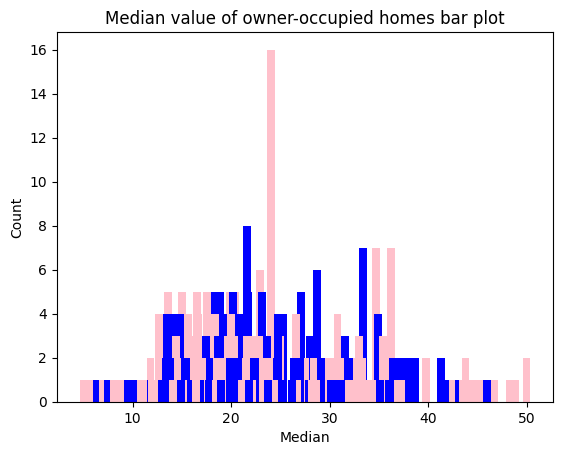

In [9]:
import matplotlib.pyplot as plt

plt.bar(boston_df.MEDV.unique(), boston_df.MEDV.value_counts(), color=['pink', 'blue'])
plt.xlabel('Median')
plt.ylabel('Count')
plt.title('Median value of owner-occupied homes bar plot')
plt.show()


In [ ]:
Provide a  bar plot for the Charles river variable


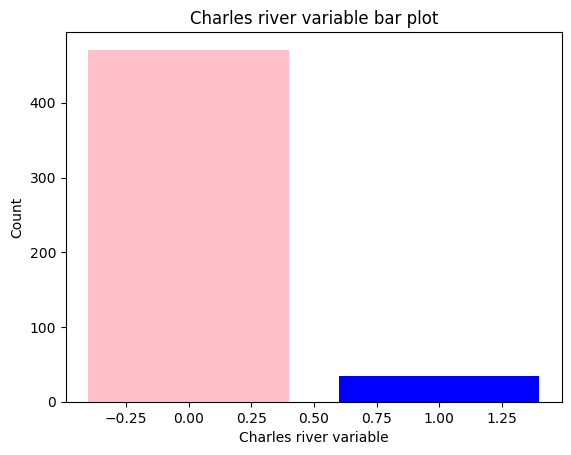

In [10]:
plt.bar(boston_df.CHAS.unique(), boston_df.CHAS.value_counts(), color=['pink', 'blue'])
plt.xlabel('Charles river variable')
plt.ylabel('Count')
plt.title('Charles river variable bar plot')
plt.show()

In [ ]:
Provide a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


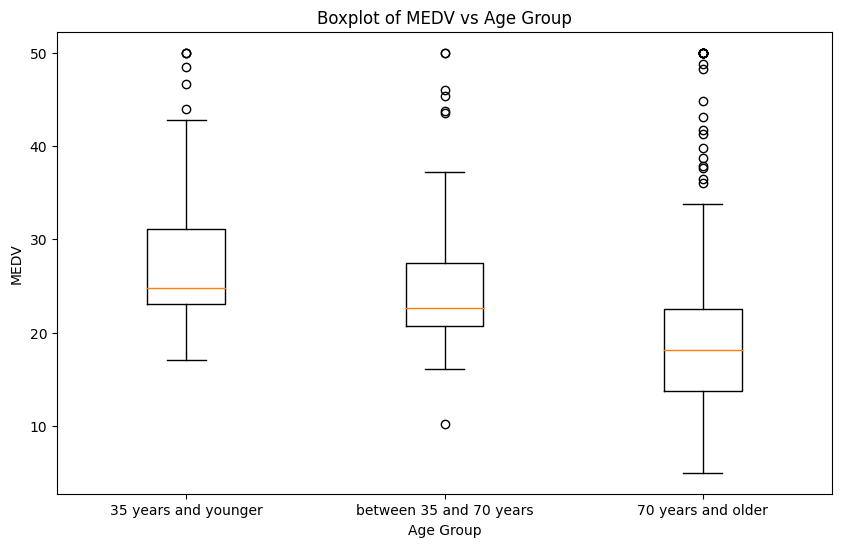

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

age_bins = [0, 35, 70, float('inf')]
age_labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
plt.boxplot([boston_df[boston_df['Age_Group'] == label]['MEDV'] for label in age_labels], labels=age_labels)
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.title('Boxplot of MEDV vs Age Group')
plt.show()


In [ ]:
Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


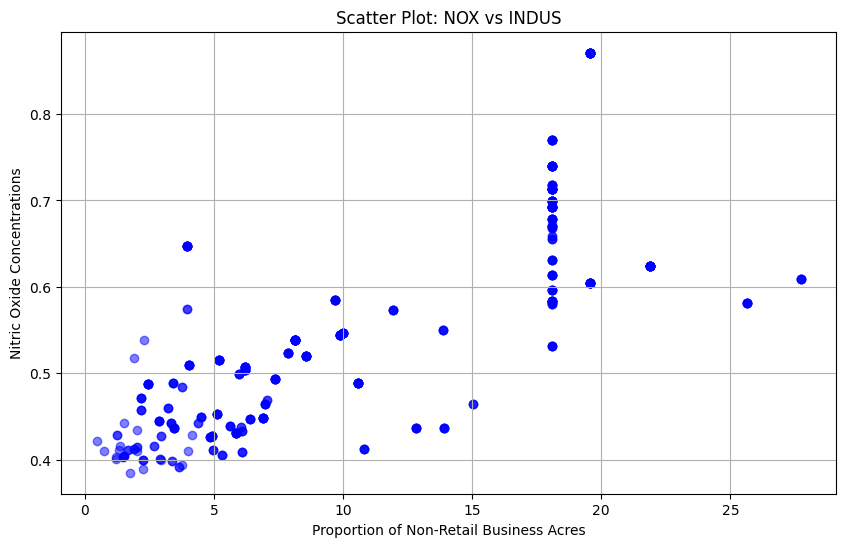

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue', alpha=0.5)
plt.xlabel('Proportion of Non-Retail Business Acres')
plt.ylabel('Nitric Oxide Concentrations')
plt.title('Scatter Plot: NOX vs INDUS')
plt.grid(True)
plt.show()


In [ ]:
Create a histogram for the pupil to teacher ratio variable


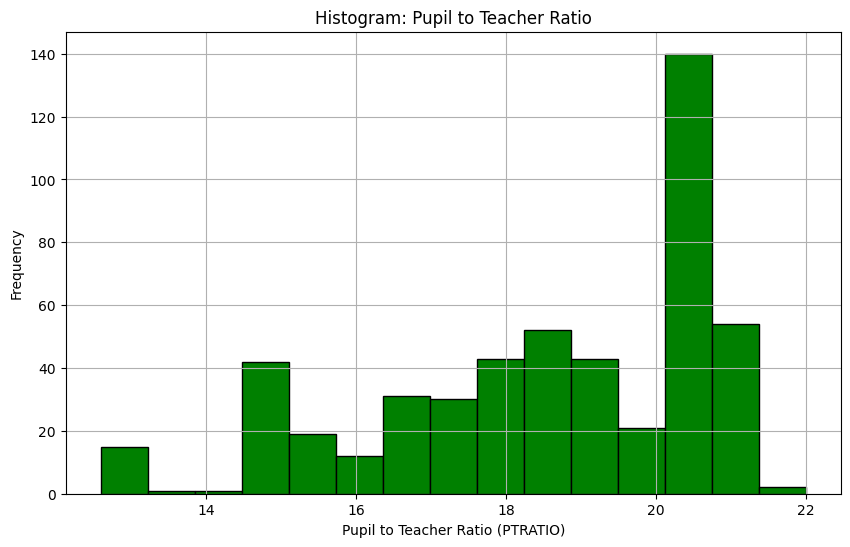

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='green', edgecolor='black')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.title('Histogram: Pupil to Teacher Ratio')
plt.grid(True)
plt.show()


In [15]:
import scipy.stats as stats
import pandas as pd

chas_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(chas_bounded, chas_not_bounded)

alpha = 0.05  # significance level
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
if p_value < alpha:
    print("There is a significant difference in median values of houses bounded by the Charles River.")
else:
    print("There is no significant difference in median values of houses bounded by the Charles River.")


T-Statistic: 3.996437466090509
P-Value: 7.390623170519905e-05
There is a significant difference in median values of houses bounded by the Charles River.


In [16]:
age_groups = boston_df.groupby('AGE')['MEDV'].apply(list).values
f_statistic, p_value = stats.f_oneway(*age_groups)
alpha = 0.05  # significance level
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
if p_value < alpha:
    print("There is a significant difference in median values of houses for each AGE category.")
else:
    print("There is no significant difference in median values of houses for each AGE category.")


F-Statistic: 0.9840091646131598
P-Value: 0.5539698276810188
There is no significant difference in median values of houses for each AGE category.


In [17]:
correlation_coefficient, p_value = stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

alpha = 0.05  # significance level
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)
if p_value < alpha:
    print("There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


Pearson Correlation Coefficient: 0.7636514469209189
P-Value: 7.913361061211254e-98
There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [ ]:

X = boston_df[['DIS']]  # Weighted distance
y = boston_df['MEDV']    # Median value
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
